In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px

In [130]:
df = pd.read_excel('C:\\Users\\elisa\\OneDrive - GENES\\Documents\\GitHub\\Projet-Python-pour-le-Data-Scientist\\base_a_traiter.xlsx')

In [6]:
df.head()

,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol
0,Air France,0,Oslo,1344.0,2022-04-01,2022-04-08,204,2.333333
1,Air France,0,Oslo,1344.0,2022-04-01,2022-04-08,204,2.500000
2,Flyr AS,0,Oslo,1344.0,2022-04-01,2022-04-08,195,2.416667
3,Flyr AS,0,Oslo,1344.0,2022-04-01,2022-04-08,195,2.416667
4,Norwegian,0,Oslo,1344.0,2022-04-01,2022-04-08,186,2.333333


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61334 entries, 0 to 61333
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Compagnie        61319 non-null  object        
 1   Total d'escales  61334 non-null  int64         
 2   Destination      61334 non-null  object        
 3   Distance         61334 non-null  float64       
 4   Date_aller       61334 non-null  datetime64[ns]
 5   Date_retour      61334 non-null  datetime64[ns]
 6   Prix             61334 non-null  int64         
 7   Duree de vol     61334 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 3.7+ MB


In [7]:
df.describe()

,Total d'escales,Distance,Prix,Duree de vol
count,73278.000000,73278.000000,73278.000000,73278.000000
mean,0.516076,1281.930674,278.167663,4.469546
std,0.520924,667.682119,312.885063,2.962306
min,0.000000,342.760000,33.000000,1.083333
25%,0.000000,1054.000000,148.000000,2.083333
50%,1.000000,1054.000000,203.000000,4.000000
75%,1.000000,2095.520000,308.000000,6.000000
max,2.000000,2486.340000,5355.000000,28.250000


<AxesSubplot:>

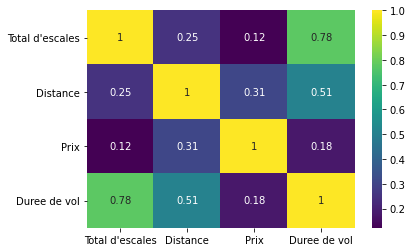

In [8]:
sns.heatmap(df.corr(), cmap= sns.color_palette("viridis", as_cmap=True), annot = True)

In [9]:
df_moyen= df.groupby(['Destination']).mean()

In [10]:
df_moyen

,Total d'escales,Distance,Prix,Duree de vol
Destination,,,,
Athenes,0.742656,2095.52,287.960344,6.443462
Londres,0.350297,342.76,173.448249,2.475336
Madrid,0.400604,1054.00,252.368457,3.729129
Moscou,0.665254,2486.34,571.197088,7.051030
Oslo,0.768169,1344.00,212.073108,5.222225


In [12]:
df_moyen['Destination']=['Athenes','Londres','Madrid','Moscou','Oslo']

<AxesSubplot:xlabel='Destination', ylabel='Prix'>

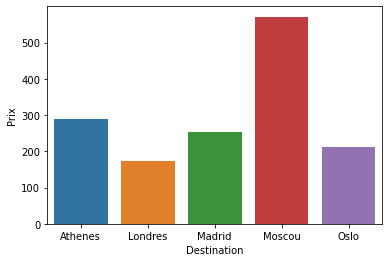

In [13]:
sns.barplot(x="Destination", y="Prix", data=df_moyen)

In [47]:
df_moyen.drop(columns = ["Destination"], inplace = True)

In [19]:
from sklearn import preprocessing

x = df_moyen.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_moyen= pd.DataFrame(x_scaled)

In [20]:
df_moyen.columns = ["Total d'escales","Distance","Prix","Duree de vol"]

In [21]:
df_moyen['Destination']=['Athenes','Londres','Madrid','Moscou','Oslo']

In [22]:
df_moyen

,Total d'escales,Distance,Prix,Duree de vol,Destination
0,0.938946,0.817679,0.287901,0.867218,Athenes
1,0.000000,0.000000,0.000000,0.000000,Londres
2,0.120387,0.331800,0.198417,0.274011,Madrid
3,0.753717,1.000000,1.000000,1.000000,Moscou
4,1.000000,0.467088,0.097109,0.600322,Oslo


In [48]:
tableau = df_moyen.to_numpy()

In [50]:
tableau2= tableau.T

In [52]:
df_normalized = pd.DataFrame(tableau2)

In [54]:
df_normalized.columns=['Athènes','Londres','Madrid','Moscou','Oslo']

In [56]:
df_normalized['Caracteristiques']=["Total d'escales","Distance","Prix","Duree de vol"]

In [57]:
df_normalized

,Athènes,Londres,Madrid,Moscou,Oslo,Caracteristiques
0,0.938946,0.0,0.120387,0.753717,1.000000,Total d'escales
1,0.817679,0.0,0.331800,1.000000,0.467088,Distance
2,0.287901,0.0,0.198417,1.000000,0.097109,Prix
3,0.867218,0.0,0.274011,1.000000,0.600322,Duree de vol


In [129]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'polar'}]])

fig.add_trace(go.Scatterpolar(
        r = list(df_normalized['Athènes'])+ [list(df_normalized['Athènes'])[0]],
        theta = list(df_normalized['Caracteristiques'])+["Total d'escales"],
        name = "Athènes"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_normalized['Londres'])+ [list(df_normalized['Londres'])[0]],
        theta = list(df_normalized['Caracteristiques'])+["Total d'escales"],
        name = "Londres"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_normalized['Madrid'])+ [list(df_normalized['Madrid'])[0]],
        theta = list(df_normalized['Caracteristiques'])+["Total d'escales"],
        name = "Madrid"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_normalized['Moscou'])+ [list(df_normalized['Moscou'])[0]],
        theta = list(df_normalized['Caracteristiques'])+["Total d'escales"],
        name = "Moscou"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_normalized['Oslo'])+ [list(df_normalized['Oslo'])[0]],
        theta = list(df_normalized['Caracteristiques'])+["Total d'escales"],
        name = "Oslo"
        ), 1, 1)
fig.show()

In [136]:
df_compagnie= df.groupby(['Compagnie']).mean()

In [141]:
df_compagnie= df_compagnie.sort_values(by = 'Prix')

In [145]:
len(df_compagnie.index)

43

In [152]:
from sklearn import preprocessing

x = df_compagnie.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_compagnie= pd.DataFrame(x_scaled)

In [148]:
compagnie_interet= list(df_compagnie.index[:3])+list(df_compagnie.index[len(df_compagnie.index)-3:])

In [153]:
df_compagnie

,0,1,2,3
0,0.181202,0.315259,0.000000,0.254002
1,0.020267,0.051312,0.006251,0.000000
2,0.023381,0.429085,0.022075,0.092918
3,1.000000,0.808374,0.034585,0.967531
4,0.518944,0.297699,0.034772,0.456210
5,0.168721,0.439891,0.041424,0.190011
6,0.500000,0.297699,0.041949,0.423683
7,0.000000,0.297699,0.045133,0.036985
8,0.000000,0.439891,0.049212,0.066528
9,0.500000,0.400300,0.051184,0.474742


In [154]:
tableau = df_compagnie.to_numpy()
tableau2= tableau.T
df_compagnie_normalized = pd.DataFrame(tableau2)
df_compagnie_normalized.columns=list(df_compagnie.index)
df_compagnie_normalized ['Caracteristiques']=["Total d'escales","Distance","Prix","Duree de vol"]

In [155]:
df_compagnie_normalized

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,Caracteristiques
0,0.181202,0.020267,0.023381,1.000000,0.518944,0.168721,0.500000,0.000000,0.000000,0.500000,...,0.503605,0.375000,0.500000,0.397208,0.233710,0.000000,0.000000,0.500000,0.500000,Total d'escales
1,0.315259,0.051312,0.429085,0.808374,0.297699,0.439891,0.297699,0.297699,0.439891,0.400300,...,0.404415,1.000000,0.914715,0.706767,1.000000,0.297699,0.297699,0.297699,0.297699,Distance
2,0.000000,0.006251,0.022075,0.034585,0.034772,0.041424,0.041949,0.045133,0.049212,0.051184,...,0.208212,0.208445,0.236153,0.315673,0.345221,0.549247,0.591206,0.872125,1.000000,Prix
3,0.254002,0.000000,0.092918,0.967531,0.456210,0.190011,0.423683,0.036985,0.066528,0.474742,...,0.401271,0.597187,0.633664,0.444512,0.455816,0.034060,0.042177,0.687490,0.983766,Duree de vol


In [ ]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'polar'}]])

for i in compagnie interet

fig.add_trace(go.Scatterpolar(
        r = list(df_normalized['Athènes'])+ [list(df_normalized['Athènes'])[0]],
        theta = list(df_normalized['Caracteristiques'])+["Total d'escales"],
        name = "Athènes"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_normalized['Londres'])+ [list(df_normalized['Londres'])[0]],
        theta = list(df_normalized['Caracteristiques'])+["Total d'escales"],
        name = "Londres"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_normalized['Madrid'])+ [list(df_normalized['Madrid'])[0]],
        theta = list(df_normalized['Caracteristiques'])+["Total d'escales"],
        name = "Madrid"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_normalized['Moscou'])+ [list(df_normalized['Moscou'])[0]],
        theta = list(df_normalized['Caracteristiques'])+["Total d'escales"],
        name = "Moscou"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_normalized['Oslo'])+ [list(df_normalized['Oslo'])[0]],
        theta = list(df_normalized['Caracteristiques'])+["Total d'escales"],
        name = "Oslo"
        ), 1, 1)
fig.show()